# Model de régression pour le vad

On entraine le modèle [de regression lineaire pour le VAD](https://github.com/SungjoonPark/EmotionDetection), n'ayant pas les CPU ou GPU nécessaires, on limites l'entrenement aux ressources disponibles, le fichier conténant les paramètres du model etant aussi lourd: 
- Voici le lien pour le fichier : https://drive.google.com/file/d/1z-XRHovt-dLzBxq0DX-tcTUSHIPV6Pas/view?usp=sharing  
- Après téléchargement, il faut mettre dans le dossier model qui se trouve dans le repertoire regression après le git 

In [18]:
! git clone https://gitlab-student.centralesupelec.fr/youssouf.bamba/regression.git

Cloning into 'regression'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 52 (delta 12), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (52/52), done.


Dans le jupyter model_vad_emobank, on charge les paramètres du model, on l'entrêne et on fait quelques jeux d'exécution. 
- le fichier jupyter contient le model et sa structure  

In [19]:
!ls

affichage.ipynb		     essai.txt		      model_vad.ipynb
data			     fichier.txt	      nom-fichier.csv
discours.csv		     model_data.csv	      regression
emobank_dim_regression.json  model_regression.ipynb   result.csv
emo_class.csv		     model_vad_emobank.ipynb


In [20]:
%cd regression/model/

/content/regression/model/regression/model


In [21]:
import numpy as np
import json
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Après avoir recuperer les données text d'imocap avec leurs labels annotées, avec le jupyter model_vad_emobank on predit les valeurs vad des 250 premières dialogues et par notre model de classification GoEmotion on classifie aussi les phrases par émotions.

- le fichier nom-fichier.csv contient nos données 
- le fichier model_data.csv contient les predictions vad
- le fichier emo_class.csv contient les predictions de classifications

In [22]:
df = pd.read_csv('nom-fichier.csv')
df1 = pd.read_csv('model_data.csv')
df2 = pd.read_csv('emo_class.csv')

In [23]:
df

Unnamed: 0                    name genre  \
0               0     Ses01M_impro06_F000     F   
1               1     Ses01M_impro06_M000     M   
2               2     Ses01M_impro06_M001     M   
3               3     Ses01M_impro06_F001     F   
4               4     Ses01M_impro06_M002     M   
...           ...                     ...   ...   
10081       10081  Ses05M_script02_2_M038     M   
10082       10082  Ses05M_script02_2_F037     F   
10083       10083  Ses05M_script02_2_M039     M   
10084       10084  Ses05M_script02_2_F038     F   
10085       10085  Ses05M_script02_2_M040     M   

                                                     phr     time     val  \
0                                              You okay?   2.5845  3.0000   
1                                  Yeah, I'm just-- yeah   4.0467  3.0000   
2                      Just kind of feel numb, you know.   3.7092  3.0000   
3                                       What's happened?   3.1275  3.0000   
4                                  You didn't even hear?   4.3018  2.5000   
...                                                  ...      ...     ...   
10081        Are you still cold?  Still want to go home?   4.6700  3.3333   
10082   No.  I'm beginning to think you might be righ...  13.4800  3.6667   
10083   Shh.  If we're really quiet, the fish might c...   6.6300  4.0000   
10084                                            Or not.   2.0100  3.6667   
10085                                            Or not.   2.3078  4.0000   

          dom     act  emo  
0      2.0000  2.5000  neu  
1      2.0000  2.5000  sad  
2      3.0000  2.0000  sad  
3      2.5000  2.0000  neu  
4      2.0000  2.0000  sad  
...       ...     ...  ...  
10081  2.3333  2.6667  xxx  
10082  2.3333  2.6667  hap  
10083  2.6667  3.0000  xxx  
10084  2.3333  2.6667  hap  
10085  2.0000  2.3333  hap  

[10086 rows x 9 columns]

In [24]:
df = df[0:250]
df = df.drop(df[df.emo == "xxx"].index)

In [25]:
df

Unnamed: 0                    name genre  \
0             0     Ses01M_impro06_F000     F   
1             1     Ses01M_impro06_M000     M   
2             2     Ses01M_impro06_M001     M   
3             3     Ses01M_impro06_F001     F   
4             4     Ses01M_impro06_M002     M   
..          ...                     ...   ...   
241         241  Ses01M_script03_1_M030     M   
242         242  Ses01M_script03_1_M031     M   
246         246  Ses01M_script03_1_M033     M   
247         247  Ses01M_script03_1_F030     F   
249         249  Ses01M_script03_1_F031     F   

                                                   phr    time  val  dom  act  \
0                                            You okay?  2.5845  3.0  2.0  2.5   
1                                Yeah, I'm just-- yeah  4.0467  3.0  2.0  2.5   
2                    Just kind of feel numb, you know.  3.7092  3.0  3.0  2.0   
3                                     What's happened?  3.1275  3.0  2.5  2.0   
4                                You didn't even hear?  4.3018  2.5  2.0  2.0   
..                                                 ...     ...  ...  ...  ...   
241   before your body rots and worms pop out of yo...  3.6200  4.0  2.5  3.5   
242   See, you know I don't care what you do.  You ...  8.9100  3.5  2.5  2.5   
246    Do you remember that row we did have in Venice?  3.3000  4.0  1.5  2.5   
247                              Which particular one?  3.1500  4.0  2.0  2.5   
249   Oh, Charles.  That was his name Charles. He d...  6.2500  5.0  3.0  4.5   

     emo  
0    neu  
1    sad  
2    sad  
3    neu  
4    sad  
..   ...  
241  hap  
242  hap  
246  hap  
247  hap  
249  exc  

[188 rows x 9 columns]

In [26]:
df1

Unnamed: 0                                               text       val  \
0             0                                          You okay?  0.147044   
1             1                              Yeah, I'm just-- yeah  0.093213   
2             2                  Just kind of feel numb, you know.  0.088872   
3             3                                   What's happened? -0.074273   
4             4                              You didn't even hear? -0.010724   
..          ...                                                ...       ...   
183         183   before your body rots and worms pop out of yo... -0.094965   
184         184   See, you know I don't care what you do.  You ... -0.156371   
185         185    Do you remember that row we did have in Venice? -0.006497   
186         186                              Which particular one?  0.022136   
187         187   Oh, Charles.  That was his name Charles. He d... -0.045233   

          aro       dom  emo  
0   -0.083684  0.116379  neu  
1   -0.156579 -0.011639  sad  
2   -0.066595 -0.014753  sad  
3   -0.065922  0.248252  neu  
4   -0.035145  0.013201  sad  
..        ...       ...  ...  
183 -0.114614  0.066494  fea  
184 -0.028629  0.080484  xxx  
185 -0.055573  0.105227  fea  
186 -0.219352  0.268704  fea  
187  0.009635  0.243854  xxx  

[188 rows x 6 columns]

In [27]:
df2

Unnamed: 0                                                phr  val  act  \
0             0                                          You okay?  3.0  2.5   
1             1                              Yeah, I'm just-- yeah  3.0  2.5   
2             2                  Just kind of feel numb, you know.  3.0  2.0   
3             3                                   What's happened?  3.0  2.0   
4             4                              You didn't even hear?  2.5  2.0   
..          ...                                                ...  ...  ...   
183         241   before your body rots and worms pop out of yo...  4.0  3.5   
184         242   See, you know I don't care what you do.  You ...  3.5  2.5   
185         246    Do you remember that row we did have in Venice?  4.0  2.5   
186         247                              Which particular one?  4.0  2.5   
187         249   Oh, Charles.  That was his name Charles. He d...  5.0  4.5   

     dom       emo  
0    2.0    others  
1    2.0   sadness  
2    3.0   sadness  
3    2.5    others  
4    2.0   sadness  
..   ...       ...  
183  2.5  exciting  
184  2.5     happy  
185  1.5     happy  
186  2.0  exciting  
187  3.0  exciting  

[188 rows x 6 columns]

In [28]:
filt = {'anger': 0, "disgusting":1, "exciting":2, "frustration":3, "fear" :4 , "happy" :5 ,"sadness" :6 , "surprised" :7 ,"others" :8}
df2['emo'] = df2['emo'].map(filt)
dat = {'phr' :df1['text'] , 'val':df1['val'], 'act':df1['aro'],'dom':df1['dom'] , 'emo' : df2['emo'] }
data = pd.DataFrame(dat)
labels = list(filt.keys())

In [29]:
df2

Unnamed: 0                                                phr  val  act  \
0             0                                          You okay?  3.0  2.5   
1             1                              Yeah, I'm just-- yeah  3.0  2.5   
2             2                  Just kind of feel numb, you know.  3.0  2.0   
3             3                                   What's happened?  3.0  2.0   
4             4                              You didn't even hear?  2.5  2.0   
..          ...                                                ...  ...  ...   
183         241   before your body rots and worms pop out of yo...  4.0  3.5   
184         242   See, you know I don't care what you do.  You ...  3.5  2.5   
185         246    Do you remember that row we did have in Venice?  4.0  2.5   
186         247                              Which particular one?  4.0  2.5   
187         249   Oh, Charles.  That was his name Charles. He d...  5.0  4.5   

     dom  emo  
0    2.0    8  
1    2.0    6  
2    3.0    6  
3    2.5    8  
4    2.0    6  
..   ...  ...  
183  2.5    2  
184  2.5    5  
185  1.5    5  
186  2.0    2  
187  3.0    2  

[188 rows x 6 columns]

## VAD pour les 250 premiers dialogues du corpus EMOCAP

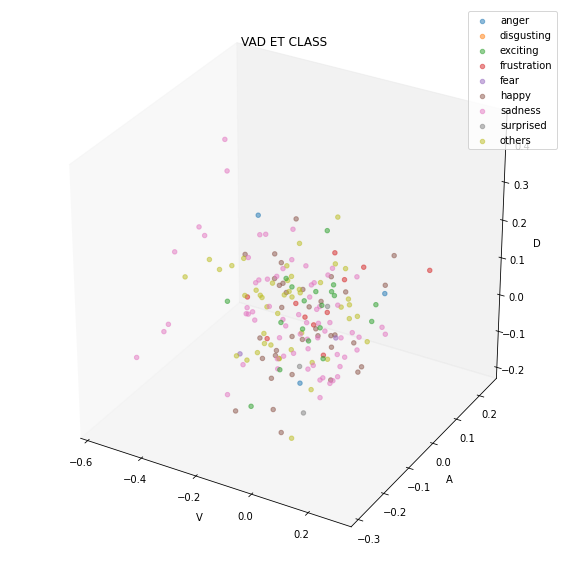

In [30]:
df3 = data
plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.rcParams['figure.autolayout'] = True
t = np.arange(1,101)
fig = plt.figure()
ax = plt.axes(projection ="3d")
#ax.plot3D(t[0:10],df4['val'][0:10],df4['aro'][0:10])
l = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive']
for i in range(9):
    d = df3[df3['emo']== i]
    c = np.ones(len(d))*i
    ax.scatter3D(d['val'],d['act'],d['dom'], c=l[i], label = labels[i], alpha=0.5)
ax.set_title("VAD ET CLASS")
ax.set_xlabel("V")
ax.set_ylabel("A")
ax.set_zlabel("D")
ax.grid(False)
plt.legend()
plt.show()

## VAD pour un discours 

In [31]:
def clear(l):
    p = []
    for i in l :
        if i != "" and i != "\t" and i != "\tab":
            p.append(i)
    return p
def read_file(filename):
    with open(filename, "r",encoding='utf8') as tf:
        lines = tf.read().split('.')
    a = []
    for l in lines :
        b = l.split('\n')
        a.extend(b)
    lines = clear(a)
    return lines

In [32]:
lines = read_file('essai.txt')
for l in lines :
  print(l)

Every time I end a letter, I think of the thousand things I yet had to tell you
 The only one I never leave out is that I love you
 I love you, I love you, I love you
 I could fill up thousands of  pages with that one simple sentence
 It fills my mind every day, all the time, everywhere
 You are my fix, your absence deprives me of energy, of oxygen
 I hate it when we part, when we say goodbye, I hate watching your silhouette fade away from my body
 I am nothing without you, without your scent, without your skin
 My Love, your are my life’s treasure, the most beautiful, the greatest, the most admirable, the most perfect in every way for me
 I would do anything – anything – to make you happy, sometimes my thoughts even scare me… But I know you wouldn’t always like it and I want you to like me
 I sometimes have awful fears ; contradictory feelings
 I’m afraid that you’ll leave me, abandon me
 I wouldn’t be able to take it
 You are so dear to my heart, my soul would be too fragile to take 

In [33]:
dl = pd.read_csv('discours.csv')


In [34]:
dl

Unnamed: 0  text       val       act       dom
0            0     1  0.040619 -0.145675 -0.071135
1            1     2  0.028271 -0.099666 -0.044872
2            2     3 -0.129741 -0.044147  0.044682
3            3     4  0.012964  0.003962  0.081020
4            4     5  0.116932  0.007482 -0.129308
5            5     6 -0.031791 -0.052130  0.049899
6            6     7  0.044120  0.035238  0.139563
7            7     8 -0.175801 -0.325666  0.463297
8            8     9  0.081243 -0.112618  0.241119
9            9    10  0.114707 -0.078340  0.026212
10          10    11  0.304663 -0.128203  0.236133
11          11    12  0.106685  0.047177 -0.020977
12          12    13  0.016180 -0.143856 -0.016262
13          13    14 -0.117243 -0.106528  0.004990
14          14    15  0.094446 -0.060036 -0.101066
15          15    16  0.025160  0.061993  0.115726
16          16    17 -0.002894 -0.062039 -0.044656
17          17    18 -0.002199 -0.015333 -0.034780
18          18    19 -0.060872 -0.078571 -0.168080
19          19    20  0.135991 -0.059335 -0.054946

No handles with labels found to put in legend.


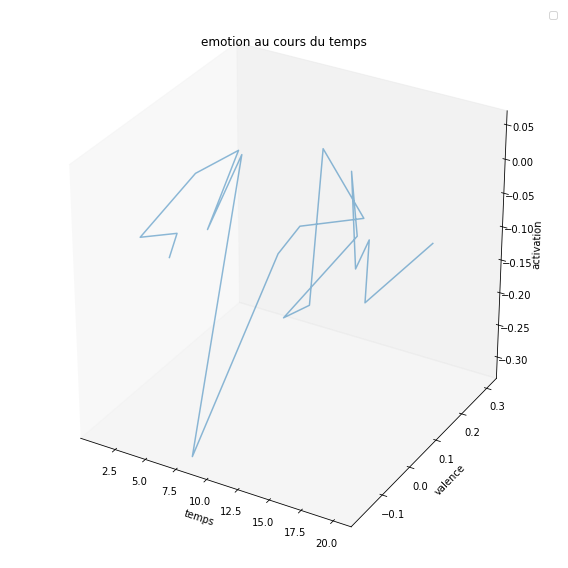

In [35]:
plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.rcParams['figure.autolayout'] = True
fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.plot3D(dl['text'], dl['val'],dl['act'],alpha=0.5)
ax.set_title("emotion au cours du temps")
ax.set_xlabel("temps")
ax.set_ylabel("valence")
ax.set_zlabel("activation")
ax.grid(False)
plt.legend()
plt.show()